<a href="https://colab.research.google.com/github/Rin4797/Data_Augmentation_Research/blob/main/drafts/Augmentation_beginning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import pickle

import tensorflow as tf

In [2]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 6800977924234443978
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14328594432
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 10051875047554795951
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
 xla_global_id: 416903419]

In [3]:
# загрузка файла с классом для визуализации

from google.colab import files
files.upload()

import sys
import os

py_file_location = "/content/visualization.py"
sys.path.append(os.path.abspath(py_file_location))

from visualization import DataVisualization, ModelVisualization, draw_dataframe

Saving visualization.py to visualization (1).py


# Датасет

## Загрузка датасета

In [4]:
!mkdir data
%cd data

mkdir: cannot create directory ‘data’: File exists
/content/data


In [5]:
!wget http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
!tar -xvf 'cifar-10-python.tar.gz'
!rm cifar-10-python.tar.gz

--2023-09-01 17:32:57--  http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz’

cifar-10-python.tar 100%[===================>] 162.60M  29.5MB/s    in 6.2s    

2023-09-01 17:33:04 (26.4 MB/s) - ‘cifar-10-python.tar.gz’ saved [170498071/170498071]

cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1


In [6]:
%cd cifar-10-batches-py
!ls
%cd ..
%cd ..

/content/data/cifar-10-batches-py
batches.meta  data_batch_2  data_batch_4  readme.html
data_batch_1  data_batch_3  data_batch_5  test_batch
/content/data
/content


## Формирование данных

In [7]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [8]:
# список названия классов

cifar_label_data = unpickle('data/cifar-10-batches-py/batches.meta')
label_names = cifar_label_data[b'label_names']
for i in range(len(label_names)):
    label_names[i] = label_names[i].decode('ASCII')
label_names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [9]:
def unpack_batch(batch_name):
    cifar_data = unpickle('data/cifar-10-batches-py/' + batch_name)
    data = cifar_data[b'data']
    labels = np.array(cifar_data[b'labels'])
    return data, labels

In [10]:
x_train = np.empty((0, 3072))
y_train = np.empty((0, ))
for i in range(5):
    data, labels = unpack_batch('data_batch_' + str(i + 1))
    x_train = np.concatenate((x_train, data), axis=0)
    y_train = np.concatenate((y_train, labels), axis=0)
print(x_train.shape, y_train.shape)

(50000, 3072) (50000,)


In [11]:
x_test, y_test = unpack_batch('test_batch')
print(x_test.shape, y_test.shape)

(10000, 3072) (10000,)


In [12]:
data = DataVisualization(label_names, x_train, y_train, x_test, y_test)

In [13]:
data.shuffle_data()
data.make_val(1000)
data.make_data()

## Описание датасета

In [14]:
data.make_data_stat()

In [15]:
data.size_data_analysis()

,name,size,std
0,train,49000,8.532292
1,val,1000,8.532292
2,test,10000,0.000000


In [16]:
data.class_data_analysis()

,name,airplane,automobile,bird,cat,deer,dog,frog,horse,ship,truck
0,train,4897,4907,4895,4903,4907,4887,4913,4907,4886,4898
1,val,103,93,105,97,93,113,87,93,114,102
2,test,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000


## Уменьшенный датасет

In [17]:
sample_size = int(x_train.shape[0] * 0.2)

indexes = np.random.choice(x_train.shape[0], sample_size, replace=False)

In [18]:
data1 = DataVisualization(label_names, x_train[indexes], y_train[indexes], x_test, y_test)

In [19]:
data1.make_val(int(data1.x_train.shape[0] * 0.02))
data1.make_data()

In [20]:
data1.make_data_stat()

In [21]:
data1.size_data_analysis()

,name,size,std
0,train,9800,19.728152
1,val,200,3.741657
2,test,10000,0.000000


In [22]:
data1.class_data_analysis()

,name,airplane,automobile,bird,cat,deer,dog,frog,horse,ship,truck
0,train,988,1026,960,953,985,964,971,983,994,976
1,val,21,23,16,24,12,22,18,20,19,25
2,test,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000


## Аугментация

### Augmentation as a layes

#### Resize and rescale

In [23]:
resize_and_rescale = tf.keras.Sequential([
  tf.keras.layers.Resizing(32, 32),
  tf.keras.layers.Rescaling(1./255)
])

#### Random rotate and flip

In [24]:
random_rotate_and_flip = tf.keras.Sequential([
  tf.keras.layers.RandomFlip("horizontal_and_vertical"),
  tf.keras.layers.RandomRotation(0.4),
])

#### Random zoom

In [25]:
random_zoom = tf.keras.Sequential([
    tf.keras.layers.RandomZoom((0.2, 0.9), (0.2, 0.9))
])

#### Random contrast

In [26]:
random_contrast = tf.keras.Sequential([
    tf.keras.layers.RandomContrast(0.7)
])

#### Random brightness

In [27]:
random_brightness = tf.keras.Sequential([
    tf.keras.layers.RandomBrightness((-0.5, 0.5), )
])

### Augmentation with dataset

In [28]:
def image_format(image_data):
    return (np.transpose(image_data.reshape(32, 32, 3, order='F'), axes=[1,0,2]))

In [29]:
small_dataset = data1.x_train.tolist()
for i in range(len(small_dataset)):
    small_dataset[i] = image_format(np.array(small_dataset[i]))
small_dataset = np.array(small_dataset)
small_dataset.shape

(9800, 32, 32, 3)

#### Flip left to right

In [30]:
flipped = tf.image.flip_left_right(small_dataset).numpy()
flipped.shape

(9800, 32, 32, 3)

In [31]:
flipped_data = DataVisualization(label_names, flipped.reshape(flipped.shape[0], 3072), data1.y_train, x_test, y_test)
flipped_data.make_val(int(flipped_data.x_train.shape[0] * 0.02))
flipped_data.make_data()

#### Grayscale

In [32]:
grayscaled = tf.image.rgb_to_grayscale(small_dataset).numpy()

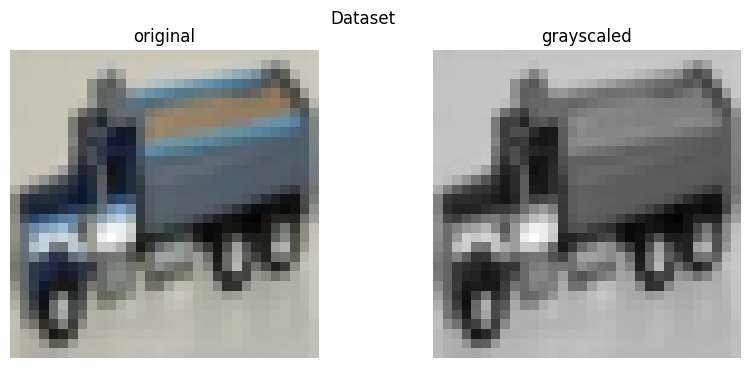

In [33]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.subplots_adjust(hspace=0.3)
plt.imshow(small_dataset[2] / 255)
plt.title("original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.subplots_adjust(hspace=0.3)
plt.imshow(np.concatenate((grayscaled[2], grayscaled[2], grayscaled[2]), axis=2) / 255)
plt.title("grayscaled")
plt.axis('off')

_ = plt.suptitle("Dataset")

In [34]:
grayscaled = np.concatenate((grayscaled, grayscaled, grayscaled), axis=3)
grayscaled.shape

(9800, 32, 32, 3)

In [35]:
grayscaled_data = DataVisualization(label_names, grayscaled.reshape(grayscaled.shape[0], 3072), data1.y_train, x_test, y_test)
grayscaled_data.make_val(int(grayscaled_data.x_train.shape[0] * 0.02))
grayscaled_data.make_data()

#### Adjusting the saturation

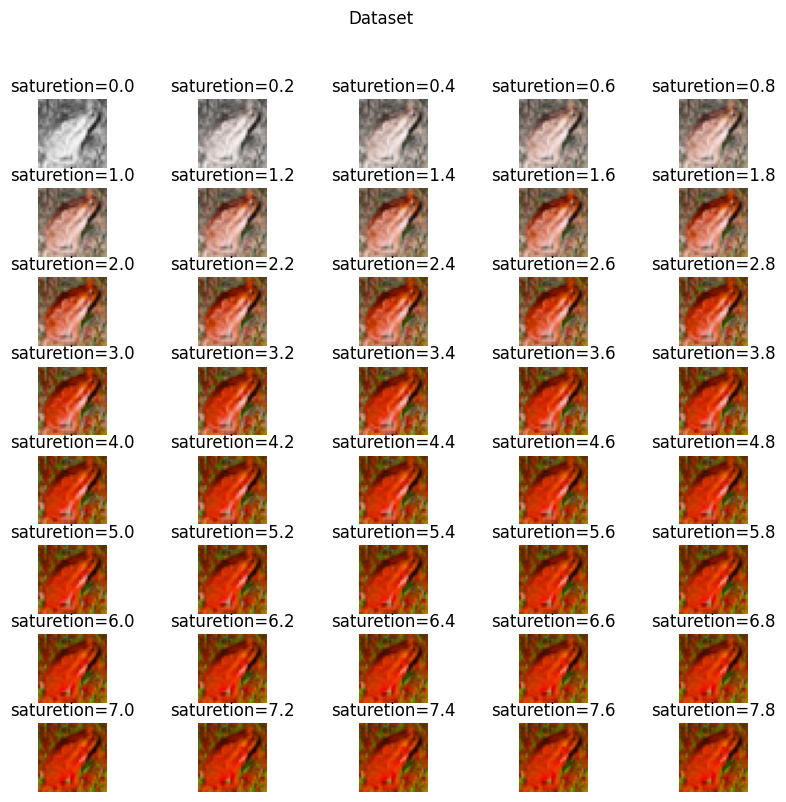

In [36]:
image = small_dataset[0]

plt.figure(figsize=(10, 9))
for n in range(40):
    plt.subplot(8, 5, n+1)
    plt.subplots_adjust(hspace=0.3)
    plt.imshow(tf.image.adjust_saturation(image, n/5) / 255)
    plt.title("saturetion=" + str(n/5))
    plt.axis('off')
_ = plt.suptitle("Dataset")

In [37]:
saturated = np.empty((0, 32, 32, 3))
for i in range(9):
    saturated = np.concatenate((saturated, tf.image.adjust_saturation(small_dataset, i / 2)), axis=0)
saturated.shape

(88200, 32, 32, 3)

In [38]:
saturated_data = DataVisualization(label_names, saturated.reshape(saturated.shape[0], 3072), np.tile(data1.y_train, 9), x_test, y_test)
saturated_data.make_val(int(saturated_data.x_train.shape[0] * 0.02))
saturated_data.make_data()

#### Random saturation

In [79]:
random_saturated = tf.image.random_saturation(small_dataset, 0, 4).numpy()

In [81]:
random_saturated_data = DataVisualization(label_names,
                                          random_saturated.reshape(random_saturated.shape[0], 3072),
                                          data1.y_train, x_test, y_test)
random_saturated_data.make_val(int(random_saturated_data.x_train.shape[0] * 0.02))
random_saturated_data.make_data()

#### Adjusting the brightness

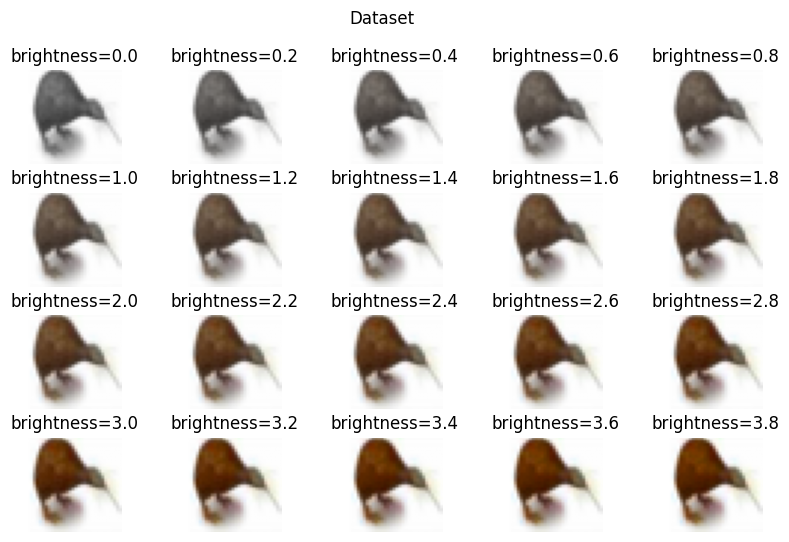

In [39]:
image = small_dataset[1]

plt.figure(figsize=(10, 6))
for n in range(20):
    plt.subplot(4, 5, n+1)
    plt.subplots_adjust(hspace=0.3)
    plt.imshow(tf.image.adjust_saturation(image, n/5) / 255)
    plt.title("brightness=" + str(n/5))
    plt.axis('off')
_ = plt.suptitle("Dataset")

In [40]:
bright = np.empty((0, 32, 32, 3))
for i in range(7):
    bright = np.concatenate((bright, tf.image.adjust_brightness(small_dataset, i / 2)), axis=0)
bright.shape

(68600, 32, 32, 3)

In [41]:
bright_data = DataVisualization(label_names, bright.reshape(bright.shape[0], 3072), np.tile(data1.y_train, 7), x_test, y_test)
bright_data.make_val(int(bright_data.x_train.shape[0] * 0.02))
bright_data.make_data()

#### Random brightness

In [83]:
random_bright = tf.image.random_brightness(small_dataset, 3).numpy()

In [85]:
random_bright_data = DataVisualization(label_names, random_bright.reshape(random_bright.shape[0], 3072),
                                       data1.y_train, x_test, y_test)
random_bright_data.make_val(int(random_bright_data.x_train.shape[0] * 0.02))
random_bright_data.make_data()

### Augmentated data

In [42]:
print(small_dataset.shape, flipped.shape, grayscaled.shape, saturated.shape, bright.shape)

(9800, 32, 32, 3) (9800, 32, 32, 3) (9800, 32, 32, 3) (88200, 32, 32, 3) (68600, 32, 32, 3)


In [43]:
augmented_dataset = np.concatenate((small_dataset, flipped, grayscaled, saturated, bright), axis=0).reshape(186200, 3072)

In [44]:
augmented_dataset_train = np.tile(data1.y_train, (1 + 1 + 1 + 9 + 7))
augmented_dataset_train.shape

(186200,)

In [45]:
data2 = DataVisualization(label_names, augmented_dataset, augmented_dataset_train, x_test, y_test)

In [46]:
data2.make_val(int(data1.x_train.shape[0] * 0.02))
data2.make_data()

In [47]:
data2.make_data_stat()

In [48]:
data2.size_data_analysis()

,name,size,std
0,train,186004,373.314666
1,val,196,4.223742
2,test,10000,0.000000


In [49]:
data2.class_data_analysis()

,name,airplane,automobile,bird,cat,deer,dog,frog,horse,ship,truck
0,train,18753,19475,18224,18095,18693,18299,18423,18651,18864,18527
1,val,19,19,16,12,22,17,26,26,22,17
2,test,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000


# Нейросети

## MobileNet

In [50]:
model = tf.keras.applications.MobileNet(
    input_shape=(32, 32, 3), #image_size
    alpha=1.0,
    depth_multiplier=1,
    dropout=0.001,
    include_top=True,
    weights=None,
    input_tensor=None,
    pooling=None,
    classes=10, #cifar-10
    classifier_activation="softmax"
)

In [51]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [52]:
model.summary()

Model: "mobilenet_1.00_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv1 (Conv2D)              (None, 16, 16, 32)        864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 16, 16, 32)       128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 16, 16, 32)        0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 16, 16, 32)       288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 16, 16, 32)       128       
 ation)                                          

## MobileNet c аугментацией

In [53]:
model1 = tf.keras.Sequential([
    resize_and_rescale,
    random_rotate_and_flip,
    random_zoom,
    random_contrast,
    random_brightness,
    model
])

In [54]:
model1.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
model1.build((None, 32, 32, 3))

In [55]:
model1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 32, 32, 3)         0         
                                                                 
 sequential_1 (Sequential)   (None, 32, 32, 3)         0         
                                                                 
 sequential_2 (Sequential)   (None, 32, 32, 3)         0         
                                                                 
 sequential_3 (Sequential)   (None, 32, 32, 3)         0         
                                                                 
 sequential_4 (Sequential)   (None, 32, 32, 3)         0         
                                                                 
 mobilenet_1.00_32 (Function  (None, 10)               3239114   
 al)                                                             
                                                      

# Работа моделей

In [56]:
def run_model(model_work, epochs_num):
    model_work.model_fit(epochs_num)
    model_work.draw_model_plot()
    model_work.draw_model_results()

In [57]:
def result_model(model_work):
    model_work.make_predictions()
    model_work.draw_confusion_matrix()
    draw_dataframe(model_work.metrics(), 'model_results')

## MobileNet на исходном датасете

In [58]:
model_work = ModelVisualization(model, data)

Epoch 1/50
766/766 [==============================] - 28s 15ms/step - loss: 1.8791 - accuracy: 0.3162 - val_loss: 1.6655 - val_accuracy: 0.3980
Epoch 2/50
766/766 [==============================] - 11s 14ms/step - loss: 1.5241 - accuracy: 0.4499 - val_loss: 1.6191 - val_accuracy: 0.4440
Epoch 3/50
766/766 [==============================] - 11s 14ms/step - loss: 1.3914 - accuracy: 0.4998 - val_loss: 1.3703 - val_accuracy: 0.5380
Epoch 4/50
766/766 [==============================] - 11s 14ms/step - loss: 1.2509 - accuracy: 0.5562 - val_loss: 1.5024 - val_accuracy: 0.4540
Epoch 5/50
766/766 [==============================] - 11s 14ms/step - loss: 1.1915 - accuracy: 0.5807 - val_loss: 1.2970 - val_accuracy: 0.5400
Epoch 6/50
766/766 [==============================] - 11s 14ms/step - loss: 1.0775 - accuracy: 0.6215 - val_loss: 1.1338 - val_accuracy: 0.6050
Epoch 7/50
766/766 [==============================] - 11s 14ms/step - loss: 1.0289 - accuracy: 0.6393 - val_loss: 1.1810 - val_accuracy:

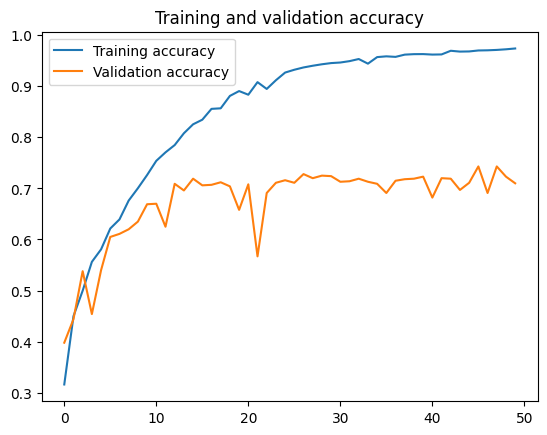

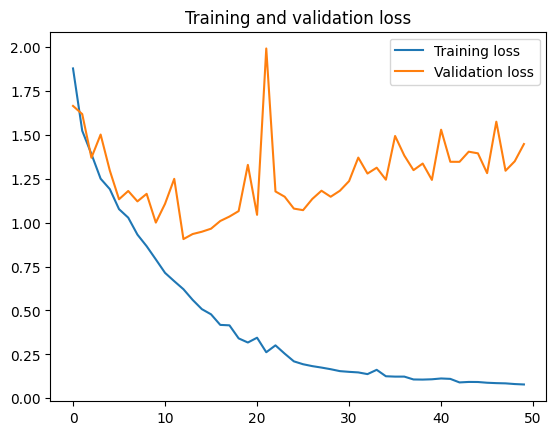

313/313 [==============================] - 2s 5ms/step - loss: 1.4073 - accuracy: 0.7304
Accuracy for test data :  0.730400025844574
Loss for test data :  1.4072954654693604


In [59]:
run_model(model_work, 50)

157/157 [==============================] - 1s 3ms/step


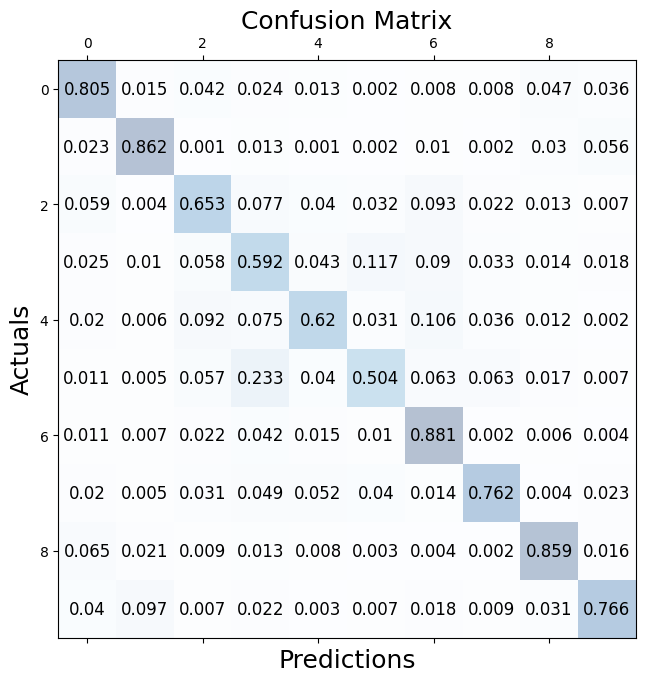

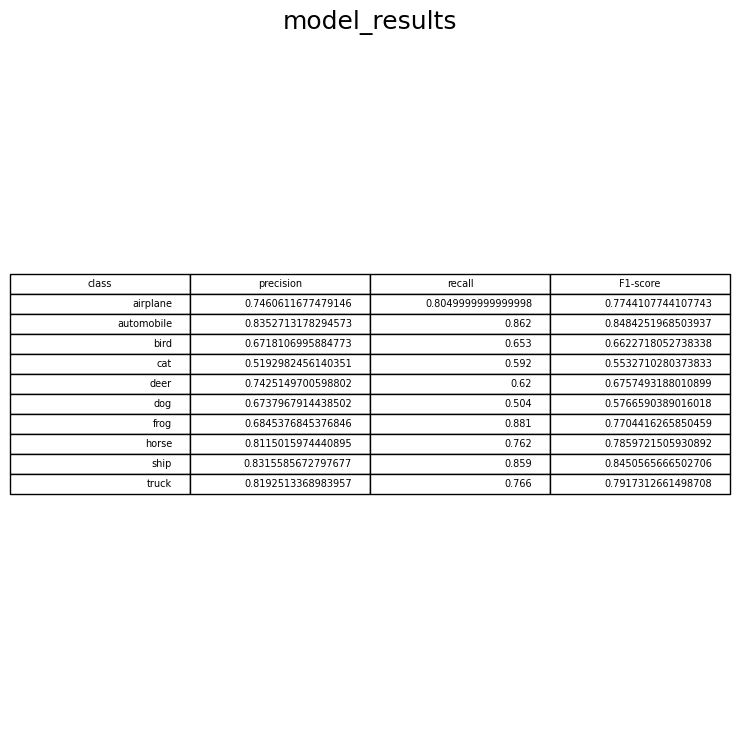

In [60]:
result_model(model_work)

## MobileNet на усеченном датасете

In [61]:
model1_work = ModelVisualization(model, data1)

Epoch 1/50
154/154 [==============================] - 2s 16ms/step - loss: 0.1003 - accuracy: 0.9703 - val_loss: 0.0594 - val_accuracy: 0.9750
Epoch 2/50
154/154 [==============================] - 2s 14ms/step - loss: 0.1133 - accuracy: 0.9614 - val_loss: 0.1595 - val_accuracy: 0.9650
Epoch 3/50
154/154 [==============================] - 2s 14ms/step - loss: 0.0865 - accuracy: 0.9730 - val_loss: 0.0870 - val_accuracy: 0.9650
Epoch 4/50
154/154 [==============================] - 2s 14ms/step - loss: 0.0903 - accuracy: 0.9707 - val_loss: 0.2318 - val_accuracy: 0.9250
Epoch 5/50
154/154 [==============================] - 2s 15ms/step - loss: 0.0538 - accuracy: 0.9819 - val_loss: 0.1655 - val_accuracy: 0.9450
Epoch 6/50
154/154 [==============================] - 2s 16ms/step - loss: 0.0524 - accuracy: 0.9824 - val_loss: 0.2403 - val_accuracy: 0.9300
Epoch 7/50
154/154 [==============================] - 2s 14ms/step - loss: 0.0666 - accuracy: 0.9793 - val_loss: 0.2799 - val_accuracy: 0.8900

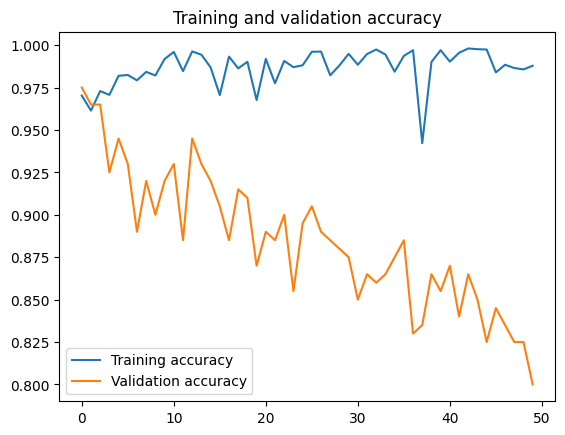

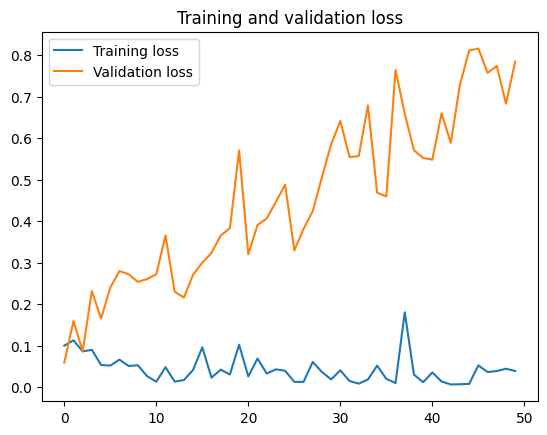

313/313 [==============================] - 1s 4ms/step - loss: 1.6133 - accuracy: 0.7036
Accuracy for test data :  0.7035999894142151
Loss for test data :  1.6132996082305908


In [62]:
run_model(model1_work, 50)

157/157 [==============================] - 1s 3ms/step


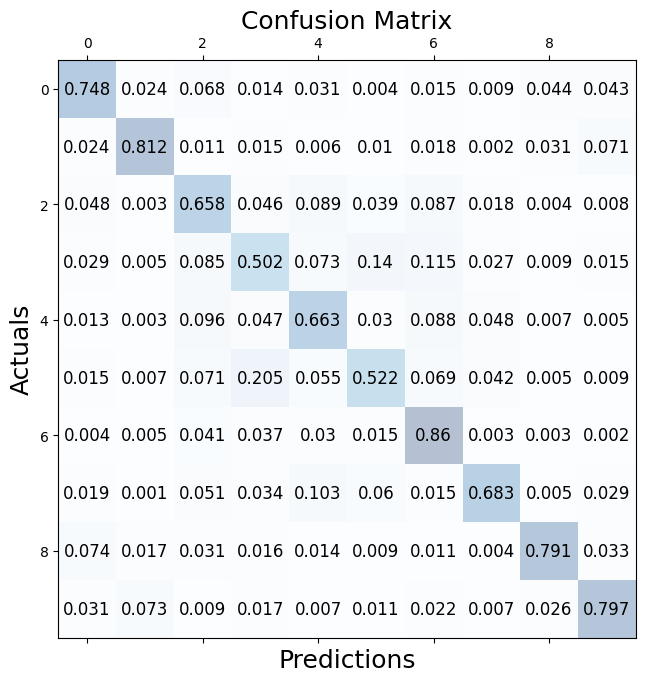

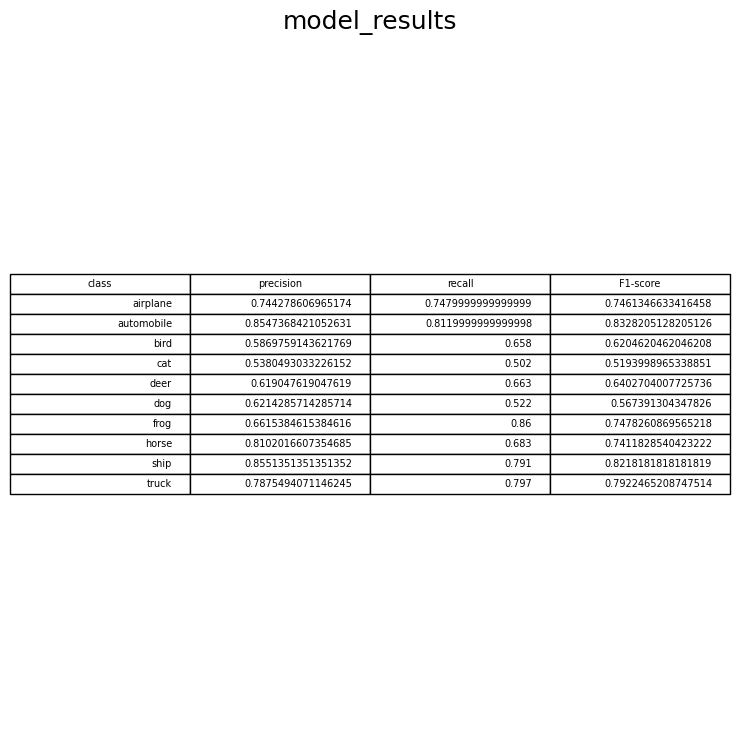

In [63]:
result_model(model1_work)

## MobileNet на усеченном датасете с аугментацией. Аугментация проводится в модели.

In [64]:
model2_work = ModelVisualization(model1, data1)

Epoch 1/50
154/154 [==============================] - 17s 20ms/step - loss: 3.6762 - accuracy: 0.1017 - val_loss: 2.7154 - val_accuracy: 0.1200
Epoch 2/50
154/154 [==============================] - 3s 18ms/step - loss: 2.3605 - accuracy: 0.0999 - val_loss: 2.5990 - val_accuracy: 0.1050
Epoch 3/50
154/154 [==============================] - 3s 17ms/step - loss: 2.3351 - accuracy: 0.1018 - val_loss: 2.3112 - val_accuracy: 0.1300
Epoch 4/50
154/154 [==============================] - 3s 16ms/step - loss: 2.3312 - accuracy: 0.1059 - val_loss: 2.4953 - val_accuracy: 0.1000
Epoch 5/50
154/154 [==============================] - 3s 17ms/step - loss: 2.3278 - accuracy: 0.1069 - val_loss: 2.3060 - val_accuracy: 0.1100
Epoch 6/50
154/154 [==============================] - 3s 17ms/step - loss: 2.3227 - accuracy: 0.1089 - val_loss: 2.3656 - val_accuracy: 0.0900
Epoch 7/50
154/154 [==============================] - 3s 17ms/step - loss: 2.3090 - accuracy: 0.1163 - val_loss: 2.2520 - val_accuracy: 0.160

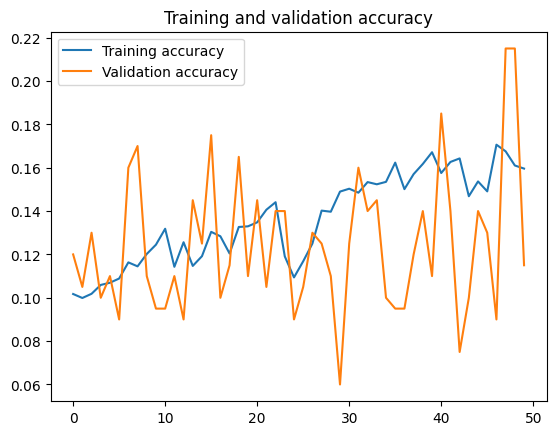

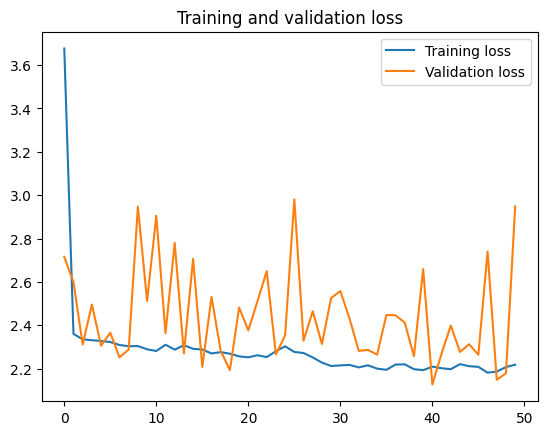

313/313 [==============================] - 2s 4ms/step - loss: 2.9758 - accuracy: 0.0995
Accuracy for test data :  0.09950000047683716
Loss for test data :  2.9757769107818604


In [65]:
run_model(model2_work, 50)

157/157 [==============================] - 1s 4ms/step


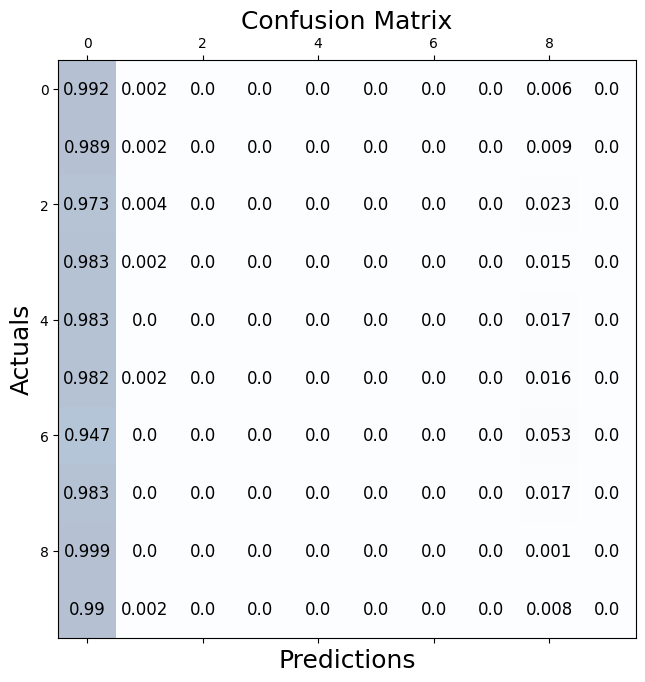

/content/visualization.py:172: RuntimeWarning: invalid value encountered in double_scalars
  acc[self.data.label_names[i]] = self.confusion_matrix[i][i] / sum(self.confusion_matrix[:, i])
/content/visualization.py:184: RuntimeWarning: invalid value encountered in double_scalars
  f1[i] = 2 * (self.confusion_matrix[i, i] / sum(self.confusion_matrix[:, i])) \
/content/visualization.py:186: RuntimeWarning: invalid value encountered in double_scalars
  (self.confusion_matrix[i, i] / sum(self.confusion_matrix[:, i]))


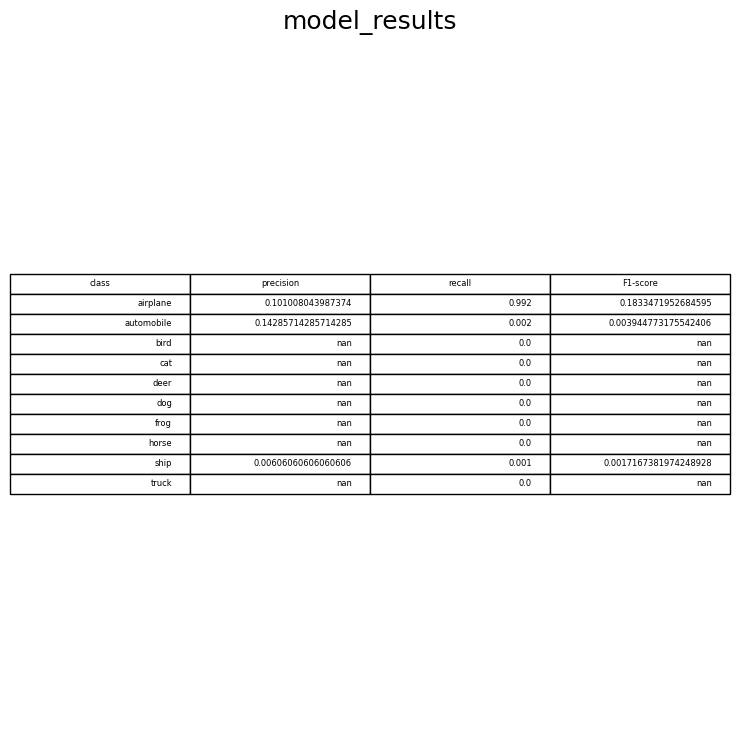

In [66]:
result_model(model2_work)

## MobileNet на усеченном датасете с аугментацией. Аугментация проводится в датасете.

In [67]:
model3_work = ModelVisualization(model, data2)

Epoch 1/50
2907/2907 [==============================] - 42s 14ms/step - loss: 1.5773 - accuracy: 0.4270 - val_loss: 0.6773 - val_accuracy: 0.7398
Epoch 2/50
2907/2907 [==============================] - 41s 14ms/step - loss: 0.6628 - accuracy: 0.7838 - val_loss: 0.1754 - val_accuracy: 0.9541
Epoch 3/50
2907/2907 [==============================] - 41s 14ms/step - loss: 0.3668 - accuracy: 0.8879 - val_loss: 0.0632 - val_accuracy: 0.9847
Epoch 4/50
2907/2907 [==============================] - 41s 14ms/step - loss: 0.2750 - accuracy: 0.9171 - val_loss: 0.0352 - val_accuracy: 0.9949
Epoch 5/50
2907/2907 [==============================] - 41s 14ms/step - loss: 0.2224 - accuracy: 0.9327 - val_loss: 0.0410 - val_accuracy: 0.9949
Epoch 6/50
2907/2907 [==============================] - 41s 14ms/step - loss: 0.1886 - accuracy: 0.9435 - val_loss: 0.0557 - val_accuracy: 0.9949
Epoch 7/50
2907/2907 [==============================] - 41s 14ms/step - loss: 0.1647 - accuracy: 0.9496 - val_loss: 0.0321 -

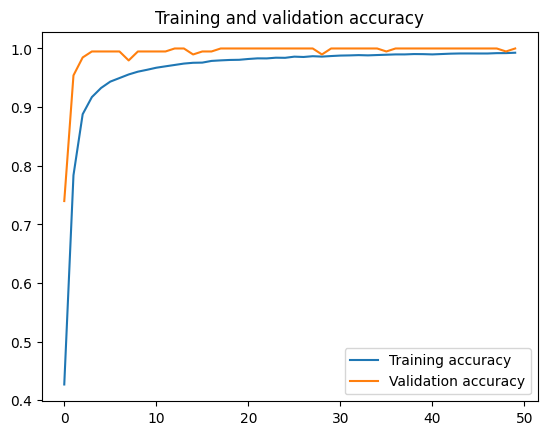

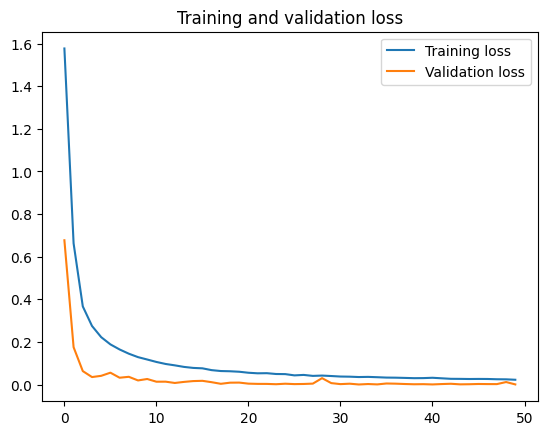

313/313 [==============================] - 1s 4ms/step - loss: 6.0114 - accuracy: 0.1594
Accuracy for test data :  0.15940000116825104
Loss for test data :  6.0114216804504395


In [68]:
run_model(model3_work, 50)

157/157 [==============================] - 1s 3ms/step


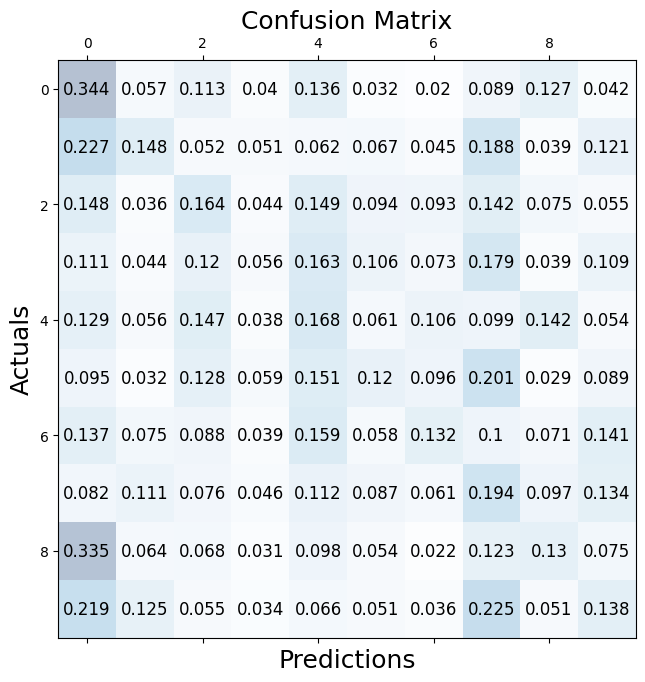

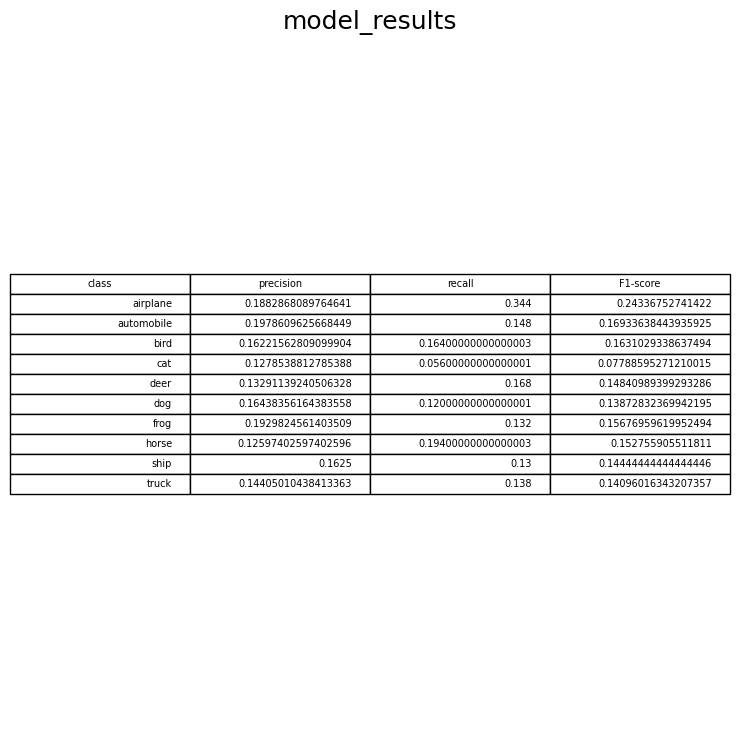

In [69]:
result_model(model3_work)

## MobileNet на усеченном датасете с аугментацией. Аугментация проводится в датасете. Аугментация частичная

In [86]:
model4_work = ModelVisualization(model, data1 + flipped_data + random_saturated_data + random_bright_data)

Epoch 1/50
604/604 [==============================] - 9s 14ms/step - loss: 0.0477 - accuracy: 0.9839 - val_loss: 1.0205 - val_accuracy: 0.8109
Epoch 2/50
604/604 [==============================] - 8s 14ms/step - loss: 0.0256 - accuracy: 0.9916 - val_loss: 1.0624 - val_accuracy: 0.8135
Epoch 3/50
604/604 [==============================] - 9s 14ms/step - loss: 0.0220 - accuracy: 0.9922 - val_loss: 1.1401 - val_accuracy: 0.8071
Epoch 4/50
604/604 [==============================] - 8s 14ms/step - loss: 0.0177 - accuracy: 0.9945 - val_loss: 1.1254 - val_accuracy: 0.7957
Epoch 5/50
604/604 [==============================] - 9s 14ms/step - loss: 0.0251 - accuracy: 0.9924 - val_loss: 1.2145 - val_accuracy: 0.7982
Epoch 6/50
604/604 [==============================] - 9s 14ms/step - loss: 0.0188 - accuracy: 0.9941 - val_loss: 1.1881 - val_accuracy: 0.7970
Epoch 7/50
604/604 [==============================] - 8s 14ms/step - loss: 0.0202 - accuracy: 0.9929 - val_loss: 1.2039 - val_accuracy: 0.7868

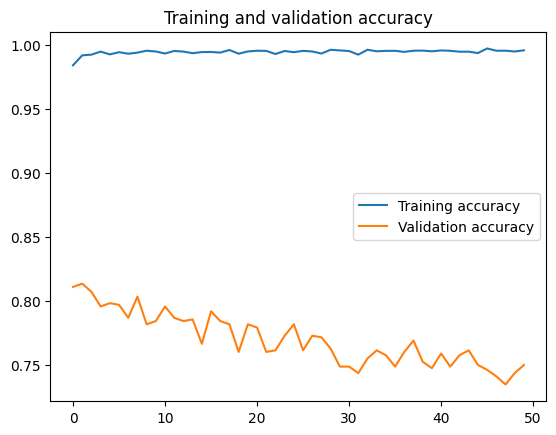

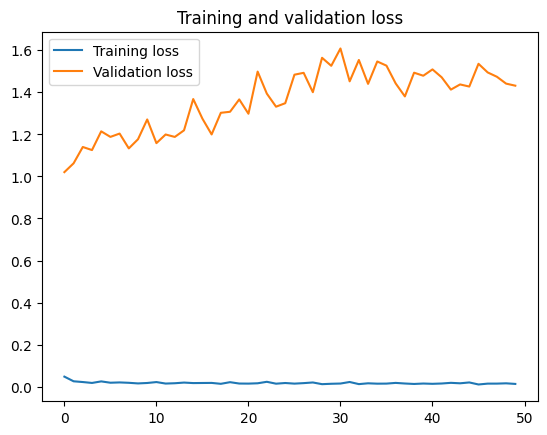

1250/1250 [==============================] - 6s 4ms/step - loss: 3.1821 - accuracy: 0.5239
Accuracy for test data :  0.5238999724388123
Loss for test data :  3.1821272373199463


In [87]:
run_model(model4_work, 50)

625/625 [==============================] - 2s 4ms/step


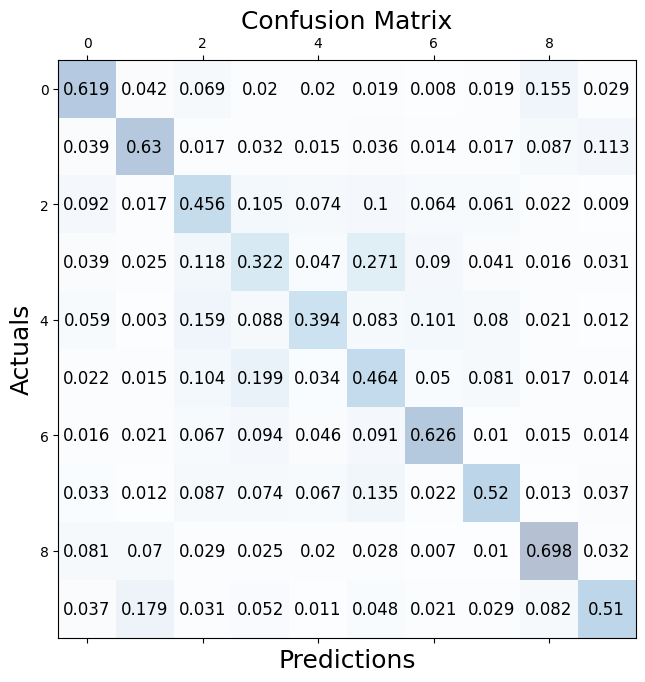

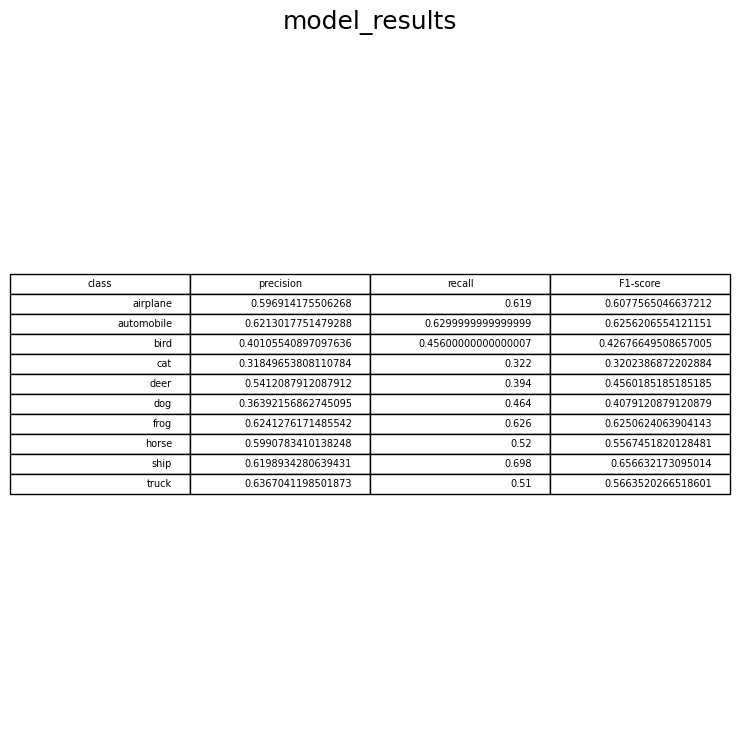

In [88]:
result_model(model4_work)